## california data (linear regression data)

In [4]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

#target값은 캘리포니아의 집값의 중앙값

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1,random_state = 32)

## Logistic regrssion 용 데이터

In [91]:
#  해당 코드는 수정하지 마세요
from sklearn.datasets import make_classification


X, y = make_classification(n_features=8, n_informative=5,
                           n_redundant=3, n_clusters_per_class=1, random_state=4, n_samples =1000 )

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

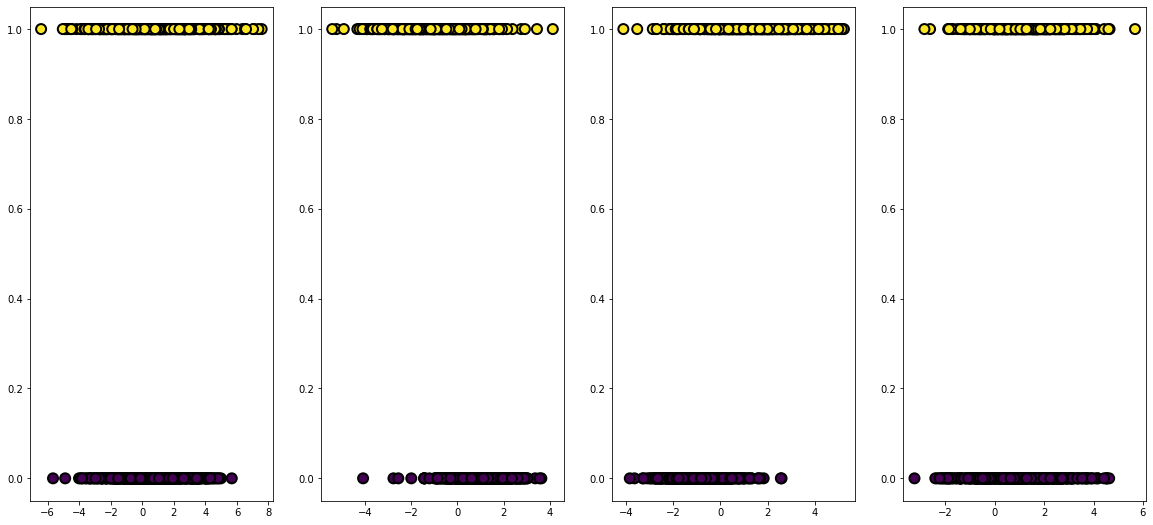

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
plt.scatter(x_train[:,0], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,2)
plt.scatter(x_train[:,1], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,3)
plt.scatter(x_train[:,2], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,4)
plt.scatter(x_train[:,3], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.show()

<h2> 1.	Coefficient interpretation (logistic regression) </h2>

A.	주어진 데이터의 모든 feature에 대해서 correlation coefficient array를 구하고 <br/>이 중 correlation coefficient 가 높은 5개의 feature를 이용해 feature간의 correlation을 heatmap으로 그린다. [5]

In [94]:
import pandas as pd
df = pd.DataFrame(X) #전체 독립변수 DataFrame으로 변환
df_target = pd.DataFrame(y) #전체 종속변수 DafaFrame으로 변환
df

,0,1,2,3,4,5,6,7
0,2.448869,0.987961,-0.392408,2.514684,0.347317,-0.002573,-1.587549,-0.124382
1,-0.697755,2.362562,-2.468210,1.174576,-1.265119,-2.380121,-0.938171,-1.090520
2,-0.639334,1.026700,-1.685357,-0.525362,-0.270319,-1.443203,-1.164062,-1.133899
3,3.004434,-1.385521,1.878130,2.235000,2.789373,0.250126,0.318288,1.115634
4,-0.597722,-1.653486,-0.074091,0.527735,-1.426407,1.693533,1.706594,0.087431
...,...,...,...,...,...,...,...,...
995,-1.111860,0.924308,0.707488,0.422264,-2.198669,1.054842,1.362627,1.018958
996,0.599167,0.789932,-1.272645,1.446781,-0.049581,-1.170442,-0.676135,-0.614608
997,-1.471838,-0.478831,0.342600,0.191772,-2.402739,1.670929,2.042493,0.641093
998,3.808383,-2.058003,2.374526,2.498742,4.112708,-0.019707,0.353089,1.287618


In [95]:
import numpy as np

correlation_list = []
for i in range(8):
    correlation_list.append(df.corrwith(df[i]))
    #X변수와 y의 correlation coefficient를 구한다.

correlation_array = np.array(correlation_list)
#array로 저장한다.

In [96]:
correlation_df = pd.DataFrame(correlation_array) 
correlation_df #corr array를 dataframe으로 바꿔준다.

,0,1,2,3,4,5,6,7
0,1.000000,-0.478951,0.436902,0.864159,0.880861,-0.018816,-0.390682,0.215001
1,-0.478951,1.000000,-0.575351,-0.304146,-0.527124,-0.566431,-0.354715,-0.367063
2,0.436902,-0.575351,1.000000,0.403478,0.588714,0.290694,0.572638,0.948551
3,0.864159,-0.304146,0.403478,1.000000,0.670715,-0.029360,-0.212808,0.315153
4,0.880861,-0.527124,0.588714,0.670715,1.000000,-0.229822,-0.183234,0.371171
5,-0.018816,-0.566431,0.290694,-0.029360,-0.229822,1.000000,0.415417,0.242491
6,-0.390682,-0.354715,0.572638,-0.212808,-0.183234,0.415417,1.000000,0.707985
7,0.215001,-0.367063,0.948551,0.315153,0.371171,0.242491,0.707985,1.000000


In [97]:
highcorr_cols = [False,False,False,False,False,False,False,False]
highcorrvalue_list = []

#correlation coefficient 값이 0.8이상인 것을 True로 지정한다.
for i in range(8):
    for j in range(i+1,8):
        if abs(correlation_df[i][j]) >= 0.8: #절대값이 0.8이상인 것 뽑기
            highcorrvalue_list.append(abs(correlation_df[i][j]))
            
highcorrvalue_list.sort(reverse = True) #내림차순 정리
print(highcorrvalue_list)
#0.8이상의 상관관계가 나타나는 값이 3개뿐이다.

[0.948550981769553, 0.8808609128773869, 0.8641594989388491]


In [98]:
for i in range(8):
    for j in range(i+1,8):
        for k in range(3):
            if abs(correlation_df[i][j]) == highcorrvalue_list[k]: #correlation coefficient절대값이 0.8이상인 feature 체크
                if highcorr_cols[i] == False:
                    highcorr_cols[i] = True
                if highcorr_cols[j] == False:
                    highcorr_cols[j] = True
            
highcorr_cols#총 8개중에 5개의 feature가 0.8이상의 상관관계를 보이므로 0,2,3,4,7 feature를 선택한다.

[True, False, True, True, True, False, False, True]

In [99]:
df = df.drop([1,5,6],axis=1)
df
#상관관계가 적은 feature들을 drop해준다

,0,2,3,4,7
0,2.448869,-0.392408,2.514684,0.347317,-0.124382
1,-0.697755,-2.468210,1.174576,-1.265119,-1.090520
2,-0.639334,-1.685357,-0.525362,-0.270319,-1.133899
3,3.004434,1.878130,2.235000,2.789373,1.115634
4,-0.597722,-0.074091,0.527735,-1.426407,0.087431
...,...,...,...,...,...
995,-1.111860,0.707488,0.422264,-2.198669,1.018958
996,0.599167,-1.272645,1.446781,-0.049581,-0.614608
997,-1.471838,0.342600,0.191772,-2.402739,0.641093
998,3.808383,2.374526,2.498742,4.112708,1.287618


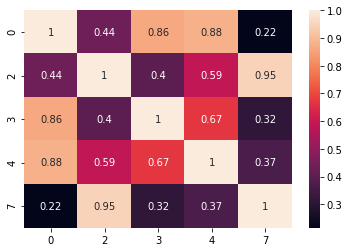

In [100]:
#이를 이용해서 feature간의 correlation을 heatmap으로 그린다.
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data = df.corr(), annot = True)

B.	위에서 구한 correlation coefficient array를 바탕으로 multiple logistic regression 모델에서사용할 feature를 정하고<br/> 90%의 데이터를 학습데이터로 사용하여 regression 모델 학습 후 10% 테스트 데이터에 대한 test acc를 출력한다. [5]

In [101]:
#train set과 test set은 주어진 data를 사용한다.
#각 x_train과 x_test의 주요 feature 5개를 남기고 삭제한다.

not_mainly_feature_index = [1,5,6]

x_train = np.delete(x_train,not_mainly_feature_index,axis = 1)
x_test = np.delete(x_test,not_mainly_feature_index,axis = 1)
#train data와 test data의 상관관계 적은 feature 제거

In [102]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
#각 feature 평균 0, 표준편차 1 인 feature로 만듬

scaler = StandardScaler()
scaler.fit(x_train)
#scaler에 train data로 학습 시키고

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
#train, test data모두 scaling 해준다.

#각 data set을 Data Frame으로 만든다
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
#정확도 score 사용
#LogisticRegression 사용

logistic = LogisticRegression()
logistic.fit(x_train,y_train)
#LogisticRegression 를 선언하고 train_Data를 학습시킨다.

predict_test = logistic.predict(x_test)
test_accuracy = accuracy_score(y_test,predict_test)
#test data를 예측하고, 실제 y값과 예측된 y값의 정확도를 판단한다.

In [104]:
test_accuracy
#test data의 정확도가 0.94이라는 좋은 성능을 보인다.

0.92

<h3>2.	Variable selection (linear regression)</h3>

	Linear regression 모델의 variable 선택을 통한 모델을 비교하기 위해서 수업시간에 배운 Adjusted R^2 을 기반으로 forward selection을 수행한 후 test \mathbit{R}^\mathbf{2}를 출력하고 x축은 선택한 variable의 개수, y축은 테스트 데이터의 Adjusted R^2과 학습데이터의 Adjusted R^2를 각각 다른 색으로 그래프를 이용해 출력한다.[10]

In [46]:
#california data를 편리하게 보기위하여 dataFlame으로 바꾼다.
import pandas as pd
import numpy as np
df = pd.DataFrame(california.data, columns=california.feature_names)
df_target = pd.DataFrame(california.target, columns=["Target"])
df
#feature 개수가 8개임을 확인

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [47]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
#각 feature 평균 0, 표준편차 1 인 feature로 만듬

scaler = StandardScaler()
scaler.fit(x_train)
#scaler에 train data로 학습 시키고

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
#train, test data모두 scaling 해준다.

#각 data set을 Data Frame으로 만든다
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [48]:
from sklearn.linear_model import LinearRegression #LinearRegression 사용
from sklearn.metrics import r2_score #R square 값 사용 


adjusted_r2_list_1 = [] #첫 변수 adj r square 값 저장 list
selected_variable = [] #선택된 변수 저장 

#forward selection 진행
#첫번째 variable 선택
for first_variable in range(8):
    first_train = pd.DataFrame(x_train[first_variable])
    Lr = LinearRegression()
    Lr.fit(first_train, y_train)
    #linearRegression 선언 후 하나의 열만 뽑아서 학습
   
    predict_train = Lr.predict(first_train)
    #train data 예측 

    r_square = r2_score(y_train,predict_train)
    adjusted_r2_list_1.append(1 - (1-r_square)*(len(y_train)-1)/(len(y_train)-first_train.shape[1]-1))
    #adjusted R squre 값 각각 저장
                              
selected_variable.append(adjusted_r2_list_1.index(max(adjusted_r2_list_1)))
#첫 variable 중 가장 adj r square 값이 좋은 변수의 index 저장
first_variable= pd.DataFrame(x_train[selected_variable[0]] )

adjusted_r2_list_2 = []

for second in range(8):
    if second in selected_variable: 
        adjusted_r2_list_2.append(0) #이미 선택된 변수의 index는 adj r2를 0으로 둠
        continue #선택된 variable이면 continue 
        
    second_train = pd.concat([first_variable,x_train[second]],axis = 1)
    Lr = LinearRegression()
    Lr.fit(second_train, y_train)
    #linearRegression 선언 후 첫번째로 좋았던 변수와 다음 열로 학습
   
    predict_train = Lr.predict(second_train)
    #train data 예측 

    r_square = r2_score(y_train,predict_train)
    adjusted_r2_list_2.append(1 - (1-r_square)*(len(y_train)-1)/(len(y_train)-second_train.shape[1]-1))
    #adjusted R squre 값 각각 저장

selected_variable.append(adjusted_r2_list_2.index(max(adjusted_r2_list_2)))
#두번째 variable 중 가장 adj r squre 값이 좋은 변수의 index 저장

second_variable = pd.concat([first_variable,x_train[selected_variable[1]]],axis = 1 )

adjusted_r2_list_3 = []

for third in range(8):
    if third in selected_variable:
        adjusted_r2_list_3.append(0) #이미 선택된 변수의 index는 adj r2를 0으로 둠
        continue #선택된 variable이면 continue 
        
    third_train = pd.concat([second_variable,x_train[third]],axis = 1)
    Lr = LinearRegression()
    Lr.fit(third_train, y_train)
    #linearRegression 선언 후 좋았던 변수들과 다음 열로 학습
   
    predict_train = Lr.predict(third_train)
    #train data 예측 

    r_square = r2_score(y_train,predict_train)
    adjusted_r2_list_3.append(1 - (1-r_square)*(len(y_train)-1)/(len(y_train)-third_train.shape[1]-1))
    #adjusted R squre 값 각각 저장

selected_variable.append(adjusted_r2_list_3.index(max(adjusted_r2_list_3)))
#세번째 variable 중 가장 r square값이 좋은 변수의 index 저장

third_variable = pd.concat([second_variable,x_train[selected_variable[2]]],axis = 1)

adjusted_r2_list_4 = []

for fourth in range(8):
    if fourth in selected_variable:
        adjusted_r2_list_4.append(0) #이미 선택된 변수의 index는 adj r2를 0으로 둠
        continue #선택된 variable이면 continue 
        
    fourth_train = pd.concat([third_variable,x_train[fourth]],axis = 1)
    Lr = LinearRegression()
    Lr.fit(fourth_train, y_train)
    #linearRegression 선언 후 지금까지 변수와 4열을 합한 것을 학습
   
    predict_train = Lr.predict(fourth_train)
    #train data 예측 

    r_square = r2_score(y_train,predict_train)
    adjusted_r2_list_4.append(1 - (1-r_square)*(len(y_train)-1)/(len(y_train)-fourth_train.shape[1]-1))
    #adjusted R squre 값 각각 저장

selected_variable.append(adjusted_r2_list_4.index(max(adjusted_r2_list_4)))
#네번째 variable 중 가장 r square값이 좋은 변수의 index 저장

keys = []
for i in range(8):
    if i in selected_variable:
        keys.append(df.columns[i])
    

selected_features_train = pd.concat([third_variable,x_train[selected_variable[3]]],axis = 1)
#최종 선택된 variable 4개로 구성된 Data Frame

selected_features_train.columns = keys

In [49]:
selected_features_train

,MedInc,HouseAge,Latitude,Longitude
0,0.248764,1.064239,-0.691638,0.642216
1,-1.269805,0.905319,-0.808583,0.667177
2,1.139517,1.858842,1.015753,-1.329702
3,0.212424,0.666938,-0.836650,0.816943
4,0.915561,-0.207124,0.852031,-1.164960
...,...,...,...,...
18571,-0.571052,0.984779,0.936231,-0.690701
18572,-0.170308,-1.399028,-0.682283,0.362653
18573,-1.104743,0.349097,1.633221,-1.788984
18574,-0.287304,0.825859,0.346830,-0.910358


In [50]:
train_adj_r_squre_score = [] #그래프에 이용하기 위해 variable 개수마다 train adj R squre 저장

train_adj_r_squre_score.append(max(adjusted_r2_list_1))
train_adj_r_squre_score.append(max(adjusted_r2_list_2))
train_adj_r_squre_score.append(max(adjusted_r2_list_3))
train_adj_r_squre_score.append(max(adjusted_r2_list_4)) 
#variable 수에 따른 train adj r2 값 저장

In [51]:
# test adj R squre 구하기
from sklearn.linear_model import LinearRegression #LinearRegression 사용
from sklearn.metrics import r2_score #R square 값 사용 

test_adj_r_squre_score = [] #variable 수에 따른 test adj R squre 저장 

x_test_first = pd.DataFrame(x_test[selected_variable[0]] )
#첫번째로 선택된 변수로 test data 나타냄

Lr = LinearRegression()
Lr.fit(first_variable, y_train)
#linear Regression 선언 후 첫번째로 선택된 변수로 train data 학습

test_first_pred = Lr.predict(x_test_first)
#test data 예측
r_square1 = r2_score(y_test,test_first_pred)
#r Square 저장 

test_adj_r_squre_score.append(1 - (1-r_square1)*(len(y_train)-1)/(len(y_train)-first_variable.shape[1]-1))
#variable가 1개일때, adj R squre 값 저장

x_test_second = pd.concat([x_test_first,x_test[selected_variable[1]]],axis = 1)
#두번째까지 선택된 변수로 test data 나타냄


Lr = LinearRegression()
Lr.fit(second_variable, y_train)
#linear Regression 선언 후 두번째 까지 선택된 변수로 train data 학습

test_second_pred = Lr.predict(x_test_second)
#test data 예측
r_square2 = r2_score(y_test,test_second_pred)
#r Square 저장 

test_adj_r_squre_score.append(1 - (1-r_square2)*(len(y_train)-1)/(len(y_train)-second_variable.shape[1]-1))
#variable가 2개일때, adj R squre 값 저장

x_test_third= pd.concat([x_test_second,x_test[selected_variable[2]]],axis = 1)
#세번째까지 선택된 변수로 test data 나타냄

Lr = LinearRegression()
Lr.fit(third_variable, y_train)
#linear Regression 선언 후 세번째 까지 선택된 변수로 train data 학습

test_third_pred = Lr.predict(x_test_third)
#test data 예측
r_square3 = r2_score(y_test,test_third_pred)
#r Square 저장 

test_adj_r_squre_score.append(1 - (1-r_square3)*(len(y_train)-1)/(len(y_train)-third_variable.shape[1]-1))
#variable가 3개일때, adj R squre 값 저장

selected_features_test= pd.concat([x_test_third,x_test[selected_variable[3]]],axis = 1)
#네번째까지 선택된 변수로 test data 나타냄

Lr = LinearRegression()
Lr.fit(selected_features_train, y_train)
#linear Regression 선언 후 네번째 까지 선택된 변수로 train data 학습

test_fourth_pred = Lr.predict(selected_features_test)
#test data 예측
r_square4 = r2_score(y_test,test_fourth_pred)
#r Square 저장 

test_adj_r_squre_score.append(1 - (1-r_square4)*(len(y_train)-1)/(len(y_train)-selected_features_train.shape[1]-1))
#variable가 4개일때, adj R squre 값 저장

In [52]:
#variable수에 따른 test R squre를 출력
print("variable의 수 : ",1,"\t","R Squre 값 : ",r_square1)
print("variable의 수 : ",2,"\t","R Squre 값 : ",r_square2)
print("variable의 수 : ",3,"\t","R Squre 값 : ",r_square3)
print("variable의 수 : ",4,"\t","R Squre 값 : ",r_square4)

variable의 수 :  1 	 R Squre 값 :  0.4791108442215779
variable의 수 :  2 	 R Squre 값 :  0.5212304119563071
variable의 수 :  3 	 R Squre 값 :  0.5275065009914393
variable의 수 :  4 	 R Squre 값 :  0.5921609440739198


In [41]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6)) 
plt.plot(range(0, 5), train_adj_r_squre_score, c='red',label = 'train_adj_R Square')
plt.plot(range(0, 5), test_adj_r_squre_score, c='blue', label = 'test_adj_R Square')

plt.legend()

#variable 수에 따른 train 의 Adjusted R^2 과 test 의 Adjusted R^2 값을 그래프로 나타냈다.

plt.title('adj R Square by variable N')
plt.xlabel('variable')
plt.ylabel('Adjusted R Square')
plt.show()

NameError: name 'train_adj_r_squre_score' is not defined

<Figure size 864x432 with 0 Axes>

<h2>3.	Regularized linear model (linear regression)</h2>

Regularization 방법 중 하나인 lasso regression을 이용하여 5-fold cross validation을 통해 최적 하이퍼파라미터 탐색 후, 최종 모델의 test R^2를 출력한다. [10]

In [181]:
import warnings # gridSearch 할때 warning이 떠서 import
warnings.filterwarnings(action='ignore')

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1,random_state = 32)

In [54]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
#각 feature 평균 0, 표준편차 1 인 feature로 만듬

scaler = StandardScaler()
scaler.fit(x_train)
#scaler에 train data로 학습 시키고

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
#train, test data모두 scaling 해준다.


In [55]:
from sklearn.linear_model import Lasso #Lasso regression 사용 위한 import
from sklearn.model_selection import GridSearchCV #GridSearch CV 이용을 위한 import

alpha = list(np.arange(0.001,5,0.001))
#alpha값을 0.001부터 0.001 씩 증가시키며 5까지 범위를 주었다.
    
param_grid = {'alpha': alpha }

#GridSearch CV를 5 fold CV 방식으로 진행한다.
grid_search = GridSearchCV(Lasso(), param_grid, cv=5).fit(x_train,y_train) 
#lasso는 상관없는 feature의 Coefficient를 0으로 만들기 때문에, 원래의 x_train을 이용한다.


In [56]:
grid_search.best_params_
#grid_search를 통한 best_parameter alpha값은 0.005이다.

{'alpha': 0.005}

In [57]:
best_lasso = Lasso(alpha = 0.005).fit(x_train,y_train)
#grid search CV를 통해서 구한 

predict_test_x = best_lasso.predict(x_test)

#최종 모델의 test R Sqaure 를 출력
print("최종 모델의 test R^2 : ",r2_score(y_test,predict_test_x))

최종 모델의 test R^2 :  0.6057415379995865
